In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import src.cryptpad_schedule as cs

df = cs.load("data/SG1218-Lab-signup-list.csv")
# Optional
df.index = pd.to_datetime(df.index)

# Ignore Yushi for now
df = df.drop("Yushi", axis=1)

df.head()

Removing TOTAL and cleaning up such that {'no': 0, 'maybe': 1, 'yes': 2}


,Ashwin,Guillaume,Aidan,Ali,Sagar,Arash,Elektra
2018-11-26 10:00:00,1,0,2,1,2,1,1
2018-11-26 13:00:00,1,0,2,2,2,2,2
2018-11-26 15:00:00,1,0,2,2,2,2,2
2018-11-27 08:00:00,2,0,2,0,2,0,1
2018-11-27 13:00:00,1,0,2,2,2,2,2


# Try assigning iteratively and using randomized choices biased by probability

In [75]:
row = df.iloc[0]
maybe = cs.get_tas_by_status(row, "maybe")
yes = cs.get_tas_by_status(row, "yes")
print("MAYBE=\n", maybe, "\n\nYES=\n", yes)

MAYBE=
 Index(['Ashwin', 'Ali', 'Arash', 'Elektra'], dtype='object') 

YES=
 Index(['Aidan ', 'Sagar'], dtype='object')


In [173]:
counts

Ashwin       7
Aidan        6
Ali          5
Guillaume    4
Elektra      4
Sagar        3
Arash        1
dtype: int64

In [174]:
yes, maybe

(Index(['Aidan ', 'Sagar'], dtype='object'),
 Index(['Ashwin', 'Ali', 'Arash', 'Elektra'], dtype='object'))

In [191]:
(1 - (counts[yes] / counts[yes].sum())) * 0.8

Aidan     0.266667
Sagar     0.533333
dtype: float64

In [192]:
np.hstack([ans, ans])

array([0.26666667, 0.53333333, 0.26666667, 0.53333333])

Text(0.5, 1.0, 'Iterations=500, skewness=-0.3049, kurtosis=-1.8321')

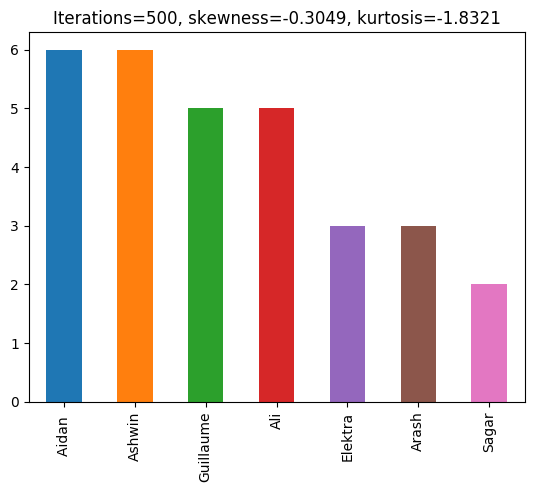

In [354]:
%matplotlib inline
prob_yes = 0.75
maxiter = 500

init_sched = "TBD"
sched = pd.Series(init_sched, index=df.index)
# sched.iloc[0] = "Sagar"
# counts = sched.value_counts()

for i in range(maxiter):
    sched = cs.schedule(df, sched, prob_yes)  # - 0.35 * i / maxiter)
    counts = sched.value_counts()
    if counts.max() <= 5 and counts.min() > 3:
        break


fig, ax = plt.subplots()
counts.plot("bar", ax=ax)
skewness = counts.skew()
kurtosis = counts.kurtosis()
ax.set_title(f"Iterations={i+1}, skewness={skewness:.4f}, kurtosis={kurtosis:.4f}")

In [355]:
sched

2018-11-26 10:00:00        Sagar
2018-11-26 13:00:00        Arash
2018-11-26 15:00:00       Ashwin
2018-11-27 08:00:00        Sagar
2018-11-27 13:00:00       Aidan 
2018-11-27 15:00:00      Elektra
2018-11-28 13:00:00       Aidan 
2018-11-28 15:00:00        Arash
2018-11-29 08:00:00       Aidan 
2018-11-29 13:00:00          Ali
2018-11-29 15:00:00        Arash
2018-11-30 13:00:00       Aidan 
2018-11-30 15:00:00          Ali
2018-12-03 08:00:00       Ashwin
2018-12-03 15:00:00    Guillaume
2018-12-04 08:00:00       Ashwin
2018-12-04 13:00:00          Ali
2018-12-04 15:00:00    Guillaume
2018-12-05 08:00:00      Elektra
2018-12-05 13:00:00          Ali
2018-12-05 15:00:00       Ashwin
2018-12-06 08:00:00    Guillaume
2018-12-06 13:00:00       Ashwin
2018-12-06 15:00:00    Guillaume
2018-12-07 15:00:00       Ashwin
2018-12-10 08:00:00       Aidan 
2018-12-10 10:00:00      Elektra
2018-12-11 08:00:00       Aidan 
2018-12-11 13:00:00    Guillaume
2018-12-11 15:00:00          Ali
dtype: obj

In [335]:
sched.value_counts()

Elektra      6
Aidan        6
Ashwin       5
Ali          5
Guillaume    4
Arash        4
dtype: int64

In [143]:
counts

Guillaume    5
Aidan        5
Ali          5
Elektra      5
Ashwin       5
Arash        4
Sagar        1
dtype: int64

In [144]:
df_sched = pd.DataFrame(sched.astype("category"), columns=["TA"])
df_sched.head()

,TA
2018-11-26 10:00:00,Aidan
2018-11-26 13:00:00,Arash
2018-11-26 15:00:00,Ashwin
2018-11-27 08:00:00,Sagar
2018-11-27 13:00:00,Elektra


In [145]:
from datetime import datetime

timestamp = datetime.strftime(datetime.now(), "%Y%m%d-%X")
df_sched.to_csv(f"output/sched_{timestamp}.csv")

fig.savefig(f"output/sched_{timestamp}.png")

AttributeError: 'AxesSubplot' object has no attribute 'savefig'